In [1]:
import numpy as np, pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
truck_df = pd.read_csv('MLR_Q08_TruckMaintenance.csv')
truck_df.head()

,Truck,Maintenance Expense,Miles Driven,Age of Truck
0,1,$908.56,"10,500",10
1,2,$751.12,"9,700",7
2,3,$793.55,"9,200",8
3,4,$619.61,"8,300",9
4,5,$380.11,"6,500",5


In [3]:
truck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Truck                23 non-null     int64 
 1   Maintenance Expense  23 non-null     object
 2   Miles Driven         23 non-null     object
 3   Age of Truck         23 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [4]:
truck_df['Expense'] = truck_df['Maintenance Expense'].str.replace('$','').astype(float)

In [5]:
truck_df['Miles Driven'] = truck_df['Miles Driven'].str.replace(',','').astype(int)
truck_df['Age of Truck'] = truck_df['Age of Truck'].astype(int)

In [6]:
truck_df.drop('Maintenance Expense', axis=1, inplace=True)
truck_df.drop('Truck', axis=1, inplace=True)
truck_df.head()

,Miles Driven,Age of Truck,Expense
0,10500,10,908.56
1,9700,7,751.12
2,9200,8,793.55
3,8300,9,619.61
4,6500,5,380.11


In [7]:
truck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Miles Driven  23 non-null     int32  
 1   Age of Truck  23 non-null     int32  
 2   Expense       23 non-null     float64
dtypes: float64(1), int32(2)
memory usage: 496.0 bytes


In [8]:
truck_df.corr()

,Miles Driven,Age of Truck,Expense
Miles Driven,1.000000,0.881707,0.973607
Age of Truck,0.881707,1.000000,0.885597
Expense,0.973607,0.885597,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

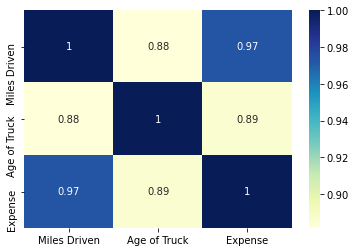

In [14]:
sns.heatmap(truck_df.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [16]:
X = truck_df.drop('Expense', axis=1)
X.head()

,Miles Driven,Age of Truck
0,10500,10
1,9700,7
2,9200,8
3,8300,9
4,6500,5


In [17]:
y = truck_df['Expense']
y.head()

0    908.56
1    751.12
2    793.55
3    619.61
4    380.11
Name: Expense, dtype: float64

In [18]:
X_sm = sm.add_constant(X)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y, X_sm).fit()

In [19]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                Expense   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     195.0
Date:                Wed, 11 May 2022   Prob (F-statistic):           7.62e-14
Time:                        22:30:13   Log-Likelihood:                -127.47
No. Observations:                  23   AIC:                             260.9
Df Residuals:                      20   BIC:                             264.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4184     29.191      0.391   

In [20]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(lr.params)

const           11.418370
Miles Driven     0.071214
Age of Truck    10.708590
dtype: float64


From above parameters we can conclude derive the linear regression line like:
Expenses = 11.418 + 0.071 * Miles Driven + 10.708 * Age of Truck


### Scaling down the data

All the parameters are on different scale. We can use MinMax or Standard Scaler to scale down data

Standard Scaler normalizes the data with mean=0 and standard deviation of 1.

MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This method is useful if we have outliers in our data

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [40]:
X_arr = np.asarray(X).reshape(-1,1)
y_arr = np.asarray(y).reshape(-1,1)

In [46]:
X_scaled = scaler.fit_transform(X_arr)
y_scaled = scaler.fit_transform(y_arr)

In [42]:
print("Mean and sd for X scaled:", np.mean(X_scaled), np.std(X_scaled))
print("Mean and sd for Y scaled:", np.mean(y_scaled), np.std(y_scaled))

Mean and sd for X scaled: 0.30122537550160056 0.3780647034961251
Mean and sd for Y scaled: 0.4874767984701052 0.3617307693282939


In [47]:
X_scaled_sm = sm.add_constant(X_scaled)

# Fit the resgression line using 'OLS'
lr_scaled = sm.OLS(y_scaled, X_scaled_sm).fit()

ValueError: endog and exog matrices are different sizes

In [48]:
X_scaled.shape

(46, 1)